In [189]:
# No show warnings
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [191]:
# Import libraries
import tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [193]:
# Load dataset
bc = datasets.load_breast_cancer()
x = bc.data
y = bc.target

In [195]:
print(x.shape, y.shape)

(569, 30) (569,)


In [197]:
# See if the target is balanced
np.unique(y, return_counts= True)

(array([0, 1]), array([212, 357], dtype=int64))

In [199]:
# Hold out
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, stratify = y, random_state=42)  # stratify -> handle the balanced

In [201]:
# Function to show the learning curves
def plot_learning_curve(hist, exp_name):
    # Creates a new figure with a fixed size.
    plt.figure(figsize=(10,4))
    for subplot, curve in enumerate(['loss', 'accuracy']):
        # Divides the figure into 1 row and 2 columns (subplot = 0 and curve = 'loss' ; subplot = 1 and curve = 'accuracy')
        plt.subplot(1,2, subplot+1)
        plt.plot(hist.history[curve], label="training")
        plt.plot(hist.history['val_'+curve], label='validation')
        plt.legend()
        plt.title(exp_name+':'+curve)
    # adjust subplot parameters and ensure that the plots no overlap
    plt.tight_layout();

In [203]:
# Function to create the Sequential model
def get_model():
    model = Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=30))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [207]:
# Create the model
model = get_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
# Line magic to measure the time for train the model
%time history = model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 2.77 s
Wall time: 2.8 s


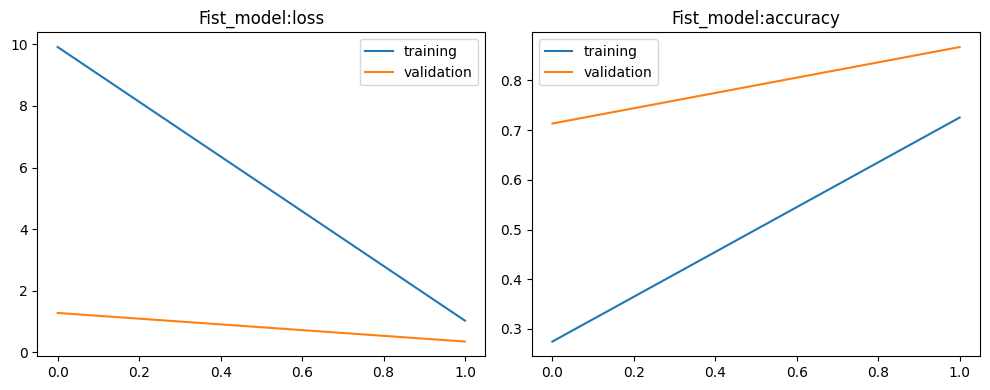

In [211]:
# Use the function to show the learning curves
plot_learning_curve(history, "Fist_model")

The model start to learn but for now is bad

### Epochs

In [214]:
# Clean session in Keras
clear_session()

In [216]:
# Create the same model but use more epochs
model = get_model()
%time history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 3.91 s
Wall time: 3.66 s


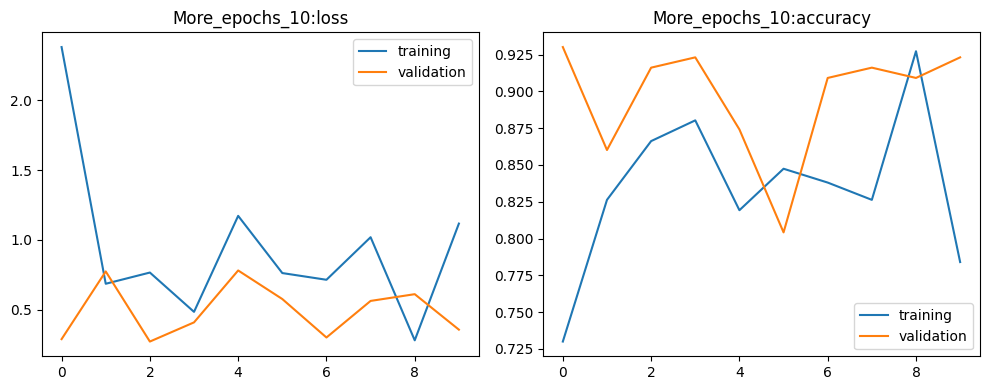

In [218]:
# The graphs show the values of loss and accuracy on the axis y, and the number of epochs on the axis x
plot_learning_curve(history, "More_epochs_10")

The model learn but with a lot oscillations

In [221]:
# Clean session in Keras
clear_session()

In [223]:
# Create the same model but stil increase the number of epochs
model = get_model()
%time history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 6.19 s
Wall time: 6.38 s


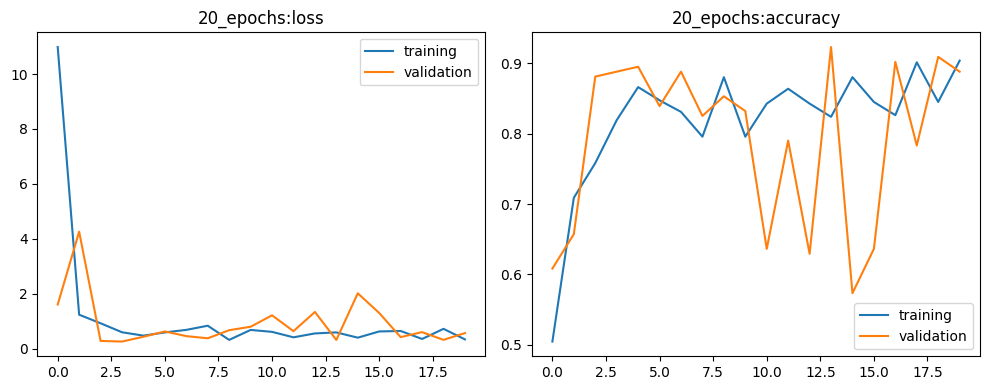

In [225]:
plot_learning_curve(history, "20_epochs")

The model learn but still with a lot oscillations. Notes that more epochs = more time to train

### Batch size

In [228]:
# Clean session in Keras
clear_session()

In [230]:
# The batch size, if not entered, is set to 32 by default.
# Set batch size to 1
model = get_model()
%time history = model.fit(x_train, y_train, batch_size = 1,epochs=20, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 32.7 s
Wall time: 25.6 s


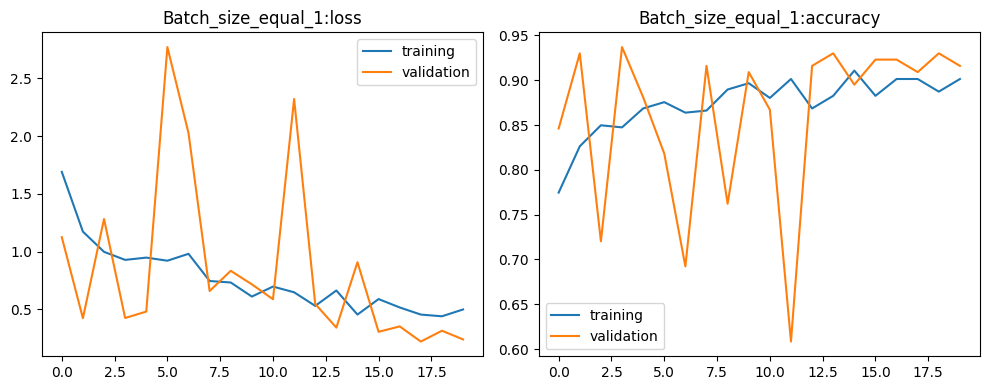

In [231]:
plot_learning_curve(history, "Batch_size_equal_1")

The model seems to be the best so far but the training process is lasted 25 seconds

In [234]:
# Clean session in Keras
clear_session()

In [242]:
# Set batch size to 500
model = get_model()
%time history = model.fit(x_train, y_train, batch_size = 500, epochs=20, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 4.56 s
Wall time: 4.69 s


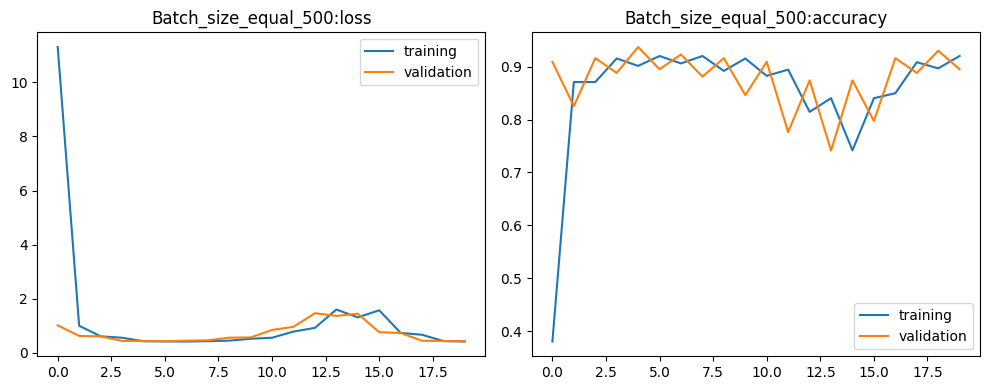

In [243]:
plot_learning_curve(history, "Batch_size_equal_500")

### Optimizer

In [246]:
# Clean session in Keras
clear_session()

In [248]:
# Function to create the Sequential model but modifying the optimizer
def get_model(some_opt):
    model = Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=30))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=some_opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [250]:
# Optimizers more used
# These objects have more parameters (learning_rate, rho, momentum, epsilon, etc..)
tf.keras.optimizers.RMSprop()
tf.keras.optimizers.Adam()
tf.keras.optimizers.SGD()            # Stochastic Gradient Descent

In [252]:
# Using SGD as optimizer
my_optimizer = tf.keras.optimizers.SGD()
model = get_model(my_optimizer)
%time history = model.fit(x_train, y_train, batch_size = 32, epochs=20, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 5.25 s
Wall time: 5.09 s


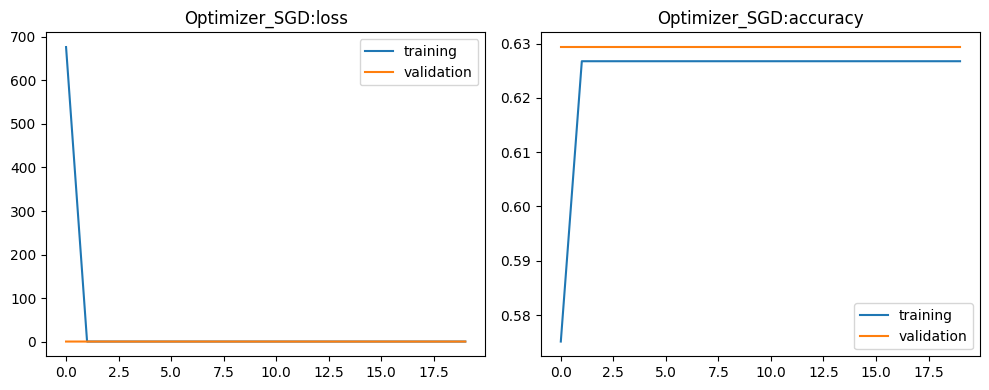

In [253]:
plot_learning_curve(history, "Optimizer_SGD")

The model is bad

In [256]:
# Clean session in Keras
clear_session()

In [258]:
# Using ADAM (Adaptive Moment) as optimizer
my_optimizer = tf.keras.optimizers.Adam()
model = get_model(my_optimizer)
%time history = model.fit(x_train, y_train, batch_size = 32, epochs=20, validation_data=(x_test, y_test), verbose = 0)

CPU times: total: 6.47 s
Wall time: 6.69 s


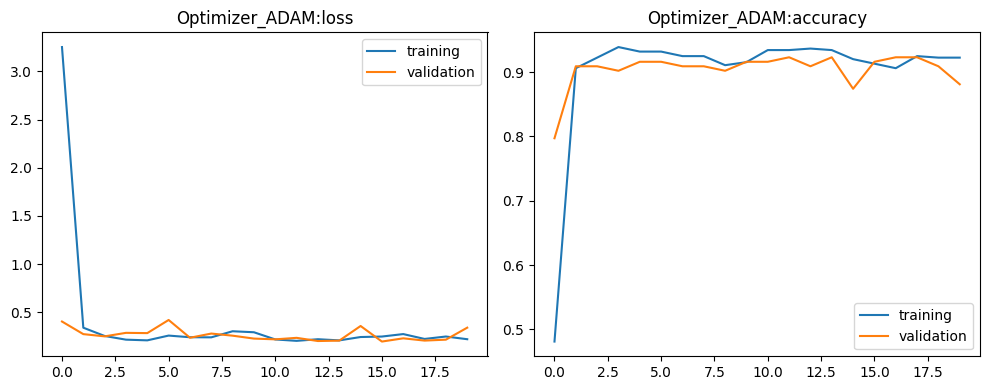

In [259]:
plot_learning_curve(history, "Optimizer_ADAM")

The model is good

### Callbacks

In [465]:
clear_session()

In [467]:
# Define again a function get_model
def get_model():
    model = Sequential()
    model.add(Dense(units=30, activation='relu', input_dim=30))
    model.add(Dense(units=30, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [469]:
# whewe are the callbacks
tf.keras.callbacks.Callback()

In [471]:
# See all methods inside this class
folder = dir(tf.keras.callbacks.Callback())
folder

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

The methods that start and finish with "__" are magic methods (indicates that the functions are for internal use and should not be called directly by users). It is a convention used to indicate that the function is "private" and not part of the public API of the module.

In [473]:
# See the public functions
[x for x in folder if not x.startswith("_")]

['model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [308]:
# Custom Callback
# Create a class that inheritance another class
class MyCallBack(tf.keras.callbacks.Callback):   # kwargs --> Any number of keyword args (Dictionary)
    def on_train_begin(self, *args, **kwargs):   # args --> Any number of positional args (tutple) 
        print("Inizio train")
        print(self.model)

    def on_train_end(self, *args, **kwargs):
        print("\nFine train")

    def on_epoch_begin(self, *args, **kwargs):
        print("\nInizio Epoca", args[0], \
             'Learning rate', self.model.optimizer.learning_rate.numpy())

    def on_epoch_end(self, *args, **kwargs):
        print("Fine epoca", args[0])
        print("args", args[1])


# With *args and **kwargs the function is flexible, so it can handle any arguments that passes to it

#### Analyze and go in depth in the functions and attributes inside the object callback

In [476]:
model = get_model()
# Call my custom callback
mycall = MyCallBack()
# Train the model
history = model.fit(x_train, y_train, batch_size = 32, epochs=5, validation_data=(x_test, y_test), verbose = 0, callbacks=[mycall]) # Pass the callback

Inizio train
<Sequential name=sequential, built=True>

Inizio Epoca 0 Learning rate 0.001
Fine epoca 0
args {'accuracy': 0.5821596384048462, 'loss': 11.092352867126465, 'val_accuracy': 0.6363636255264282, 'val_loss': 2.9299159049987793}

Inizio Epoca 1 Learning rate 0.001
Fine epoca 1
args {'accuracy': 0.5093896985054016, 'loss': 3.4330859184265137, 'val_accuracy': 0.440559446811676, 'val_loss': 2.370295286178589}

Inizio Epoca 2 Learning rate 0.001
Fine epoca 2
args {'accuracy': 0.5962441563606262, 'loss': 1.8700824975967407, 'val_accuracy': 0.4545454680919647, 'val_loss': 2.616354465484619}

Inizio Epoca 3 Learning rate 0.001
Fine epoca 3
args {'accuracy': 0.6666666865348816, 'loss': 1.7374438047409058, 'val_accuracy': 0.6363636255264282, 'val_loss': 1.089255452156067}

Inizio Epoca 4 Learning rate 0.001
Fine epoca 4
args {'accuracy': 0.6666666865348816, 'loss': 1.8291364908218384, 'val_accuracy': 0.37062937021255493, 'val_loss': 5.5858964920043945}

Fine train


We have some "logs" in the process of training

### Create 3 callback (1. for save the loss of every batch, 2. to set LR to 0.001 in even epochs and 0.005 in odd epochs, 3. for stop the training with val_accuracy = 0.9)

In [479]:
# callback to save loss of every batch
class BatchLogger(tf.keras.callbacks.Callback): 

    def on_train_begin(self, *args, **kwargs):
        self.batch_loss = []                       # Create the list 
        
    def on_batch_end(self, *args, **kwargs):
        # print('Batch:', args[0])
        # print('Batch loss:', kwargs['logs']['loss'])
        self.batch_loss.append(kwargs['logs']['loss'])                 # Add the values of loss in the list
        

In [481]:
# callback to set Learning rate
class LRScheduler(tf.keras.callbacks.Callback): 

    def on_epoch_begin(self, *args, **kwargs):
        print("\nInizio Epoca", args[0])
        if args[0]%2==0:  # Even epoch
            self.model.optimizer.learning_rate = 0.001
            # print('Learning rate', self.model.optimizer.learning_rate.numpy()) 
        else:             # Odd epoch
            self.model.optimizer.learning_rate = 0.005
            # print('Learning rate', self.model.optimizer.learning_rate.numpy()) 
            

In [491]:
# callback to apply the stop for training
class EarlyStopper(tf.keras.callbacks.Callback): 

    def on_epoch_end(self, epoch, logs, *kwargs):
        # print('Epoch:', epoch)
        print('Validation accuracy: ',logs['val_accuracy'])
        if logs['val_accuracy'] > 0.9:
            print("STOP!")
            self.model.stop_training = True           # Stop the training

In [493]:
# Create the objects (callbacks)
batchlogger = BatchLogger()
lrscheduler = LRScheduler()
earlystopper = EarlyStopper()

In [501]:
clear_session()
model = get_model()
history = model.fit(x_train, y_train, batch_size = 32, epochs=50, 
                    validation_data=(x_test, y_test), verbose = 0, 
                    callbacks=[batchlogger, lrscheduler, earlystopper])       # Insert the objects inside callbacks hyperparameter


Inizio Epoca 0
Validation accuracy:  0.5104895234107971

Inizio Epoca 1
Validation accuracy:  0.37062937021255493

Inizio Epoca 2
Validation accuracy:  0.7132866978645325

Inizio Epoca 3
Validation accuracy:  0.6783216595649719

Inizio Epoca 4
Validation accuracy:  0.9160839319229126
STOP!


In [502]:
print("Lenght of list that include the error loss for every epoch: ", len(batchlogger.batch_loss))
print("Show the last 5 values:\n", batchlogger.batch_loss[:-6:-1])

Lenght of list that include the error loss for every epoch:  70
Show the last 5 values:
 [1.2500982284545898, 1.2801463603973389, 1.362594485282898, 1.435873031616211, 1.5342847108840942]


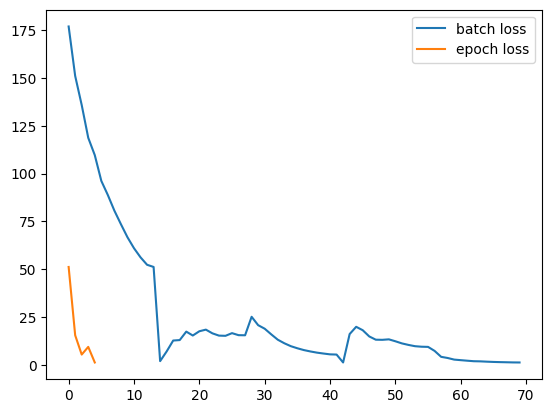

In [533]:
# Show the plot for the errors loss
plt.plot(batchlogger.batch_loss, label="batch loss")
plt.plot(history.history['loss'], label="epoch loss")
plt.legend();

The values of loss for every epoch (5) are many less than the values of loss for every batch (70). We can stretched these value

In [544]:
len(history.epoch)

5

In [546]:
# Find how much batch there are for every epoch
len(batchlogger.batch_loss)/ len(history.epoch)

14.0

In [560]:
# Stretched loss epoch
stretched_loss_epoch = [ [x]*14  for x in history.history['loss']]

In [588]:
stretched_loss_epoch

[[51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734,
  51.171627044677734],
 [15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535,
  15.466729164123535],
 [5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988,
  5.387921333312988],
 [9.397998809814453,
  9.397998809814453,
  9.397998809814453,
  9.397998809814453,
  9

In [590]:
# Concatenates all sublists into one single list.
flatten_loss_epoch = sum(stretched_loss_epoch, [])

In [592]:
len(flatten_loss_epoch)

70

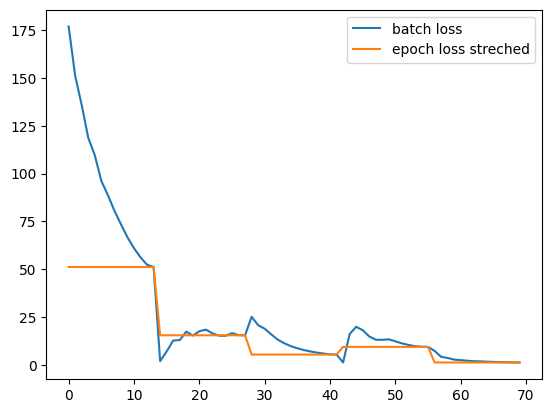

In [594]:
# Show the plot for the errors loss
plt.plot(batchlogger.batch_loss, label="batch loss")
plt.plot(flatten_loss_epoch, label="epoch loss streched")
plt.legend();